In [46]:
import plots
import prepare_data
import voronoi_analysis
import numpy as np
import matplotlib.pyplot as plt

In [72]:
import importlib
importlib.reload(voronoi_analysis)
importlib.reload(plots)

<module 'plots' from 'c:\\Users\\Magda\\Documents\\GitHub\\solution_pipes_patterns\\plots.py'>

In [48]:
data_path="new_points.dat"
area_limit=14

In [49]:
data_path_random="new_points_random.dat"

In [73]:
df = prepare_data.read_data(data_path, preprocessed=True)
df_random= prepare_data.read_data(data_path_random, preprocessed=True)

voronoi_analyser = voronoi_analysis.VoronoiAnalyser(df)
voronoi_plotter = plots.Voronoi_Plotter(df)

voronoi_analyser_random = voronoi_analysis.VoronoiAnalyser(df_random)
voronoi_plotter_random = plots.Voronoi_Plotter(df_random)

BaseVoronoi initialized
BaseVoronoi initialized
BaseVoronoi initialized
BaseVoronoi initialized


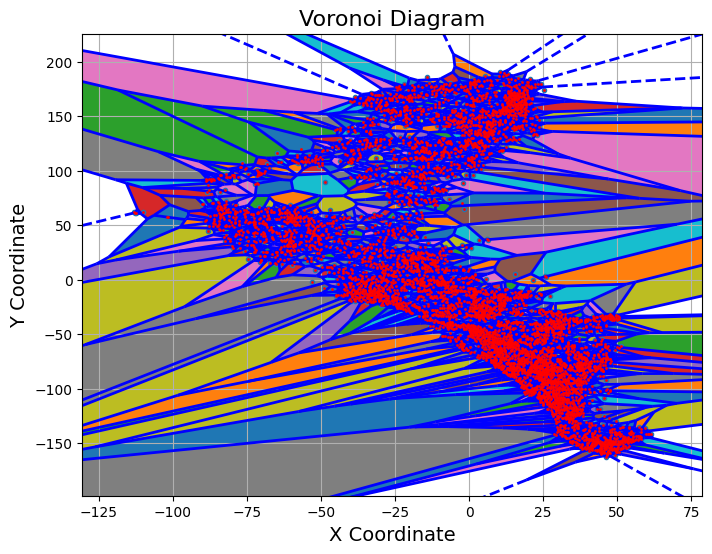

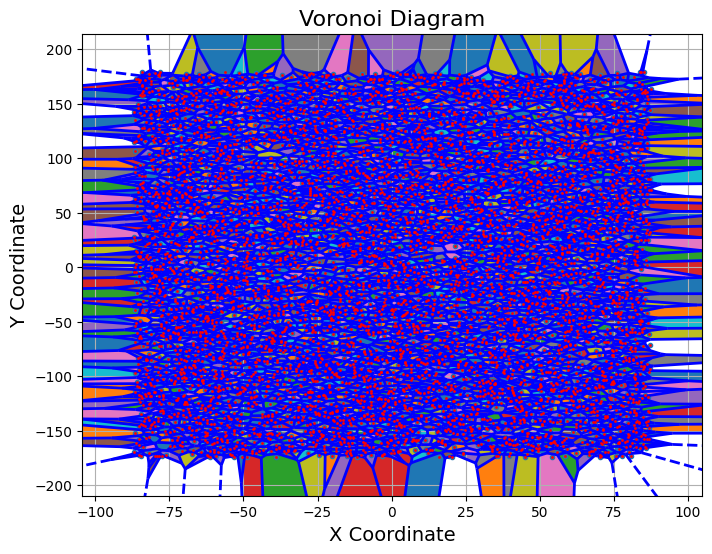

In [51]:
voronoi_plotter.all_voronoi_diagram()
voronoi_plotter_random.all_voronoi_diagram()

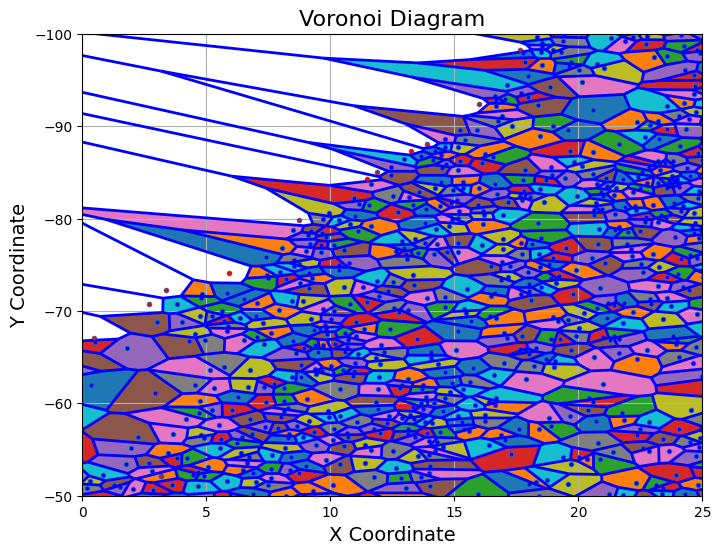

In [67]:
voronoi_plotter.all_voronoi_diagram_area_filtered(area_limit)

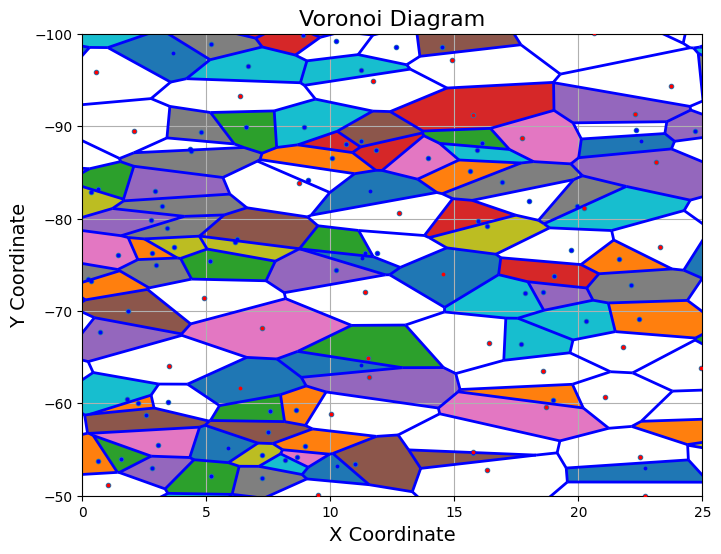

In [68]:
voronoi_plotter_random.all_voronoi_diagram_area_filtered(area_limit)

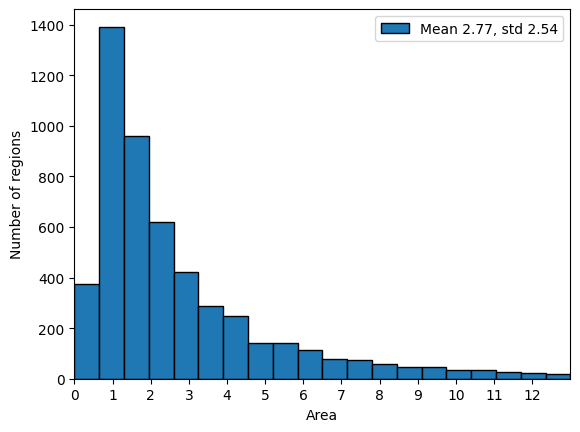

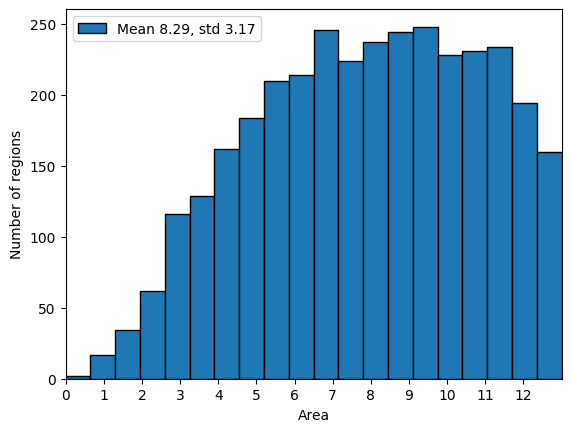

In [53]:
areas = df.loc[df["Point of Voronoi"] == 1, "Area"]
voronoi_plotter.areas_hist(areas)

areas_random = df_random.loc[df_random["Point of Voronoi"] == 1, "Area"]
voronoi_plotter.areas_hist(areas_random)

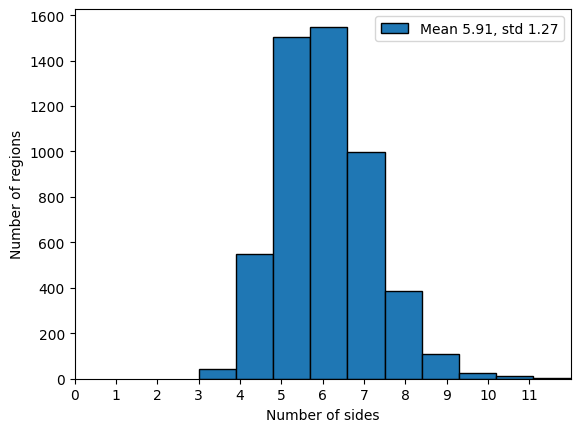

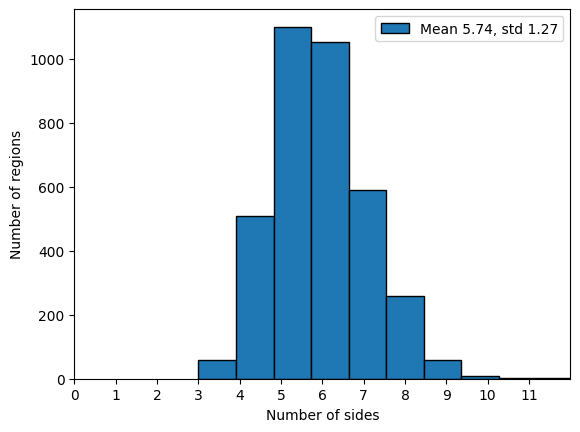

In [54]:
sides=voronoi_analyser.calculate_sides()
voronoi_plotter.sides_number_hist(sides)

sides_random=voronoi_analyser_random.calculate_sides()
voronoi_plotter.sides_number_hist(sides_random)

In [55]:
print(len(sides))

5177


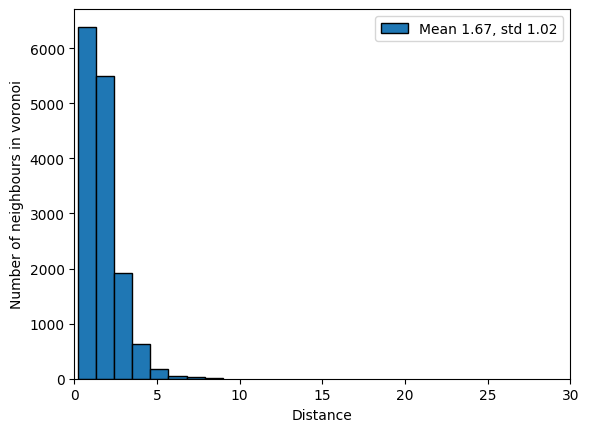

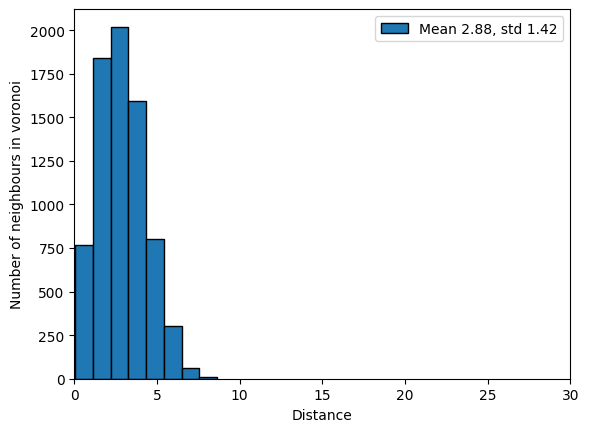

In [56]:
distances=voronoi_analyser.calculate_distance_between_neighbours()
voronoi_plotter.distance_between_neighbours_hist(distances)

distances_random=voronoi_analyser_random.calculate_distance_between_neighbours()
voronoi_plotter.distance_between_neighbours_hist(distances_random)

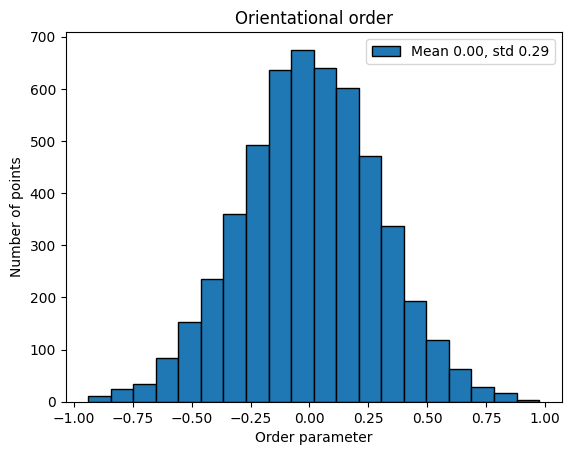

In [57]:
updated_df = voronoi_analyser.calculate_orientational_order(absolute = False)
order=updated_df.loc[df['Point of Voronoi']==1, 'Hexatic order']
voronoi_plotter.order_hist(order)

In [58]:
updated_df


,Pipe radius,Center x coordinate,Center y coordinate,Point of Voronoi,Area,Region index,Hexatic order
0,1.823,-53.710,51.715,1.0,2.053,4123.0,0.447527
1,1.801,-54.303,50.209,1.0,1.991,4121.0,-0.171921
2,1.977,-53.094,50.607,1.0,2.869,4128.0,0.105063
3,0.966,-54.517,51.519,1.0,2.809,4122.0,0.127417
4,1.296,-55.146,50.177,1.0,4.043,4124.0,0.835761
...,...,...,...,...,...,...,...
5536,1.644,5.186,182.048,1.0,6.123,270.0,0.110878
5537,2.055,7.429,182.140,1.0,5.348,104.0,-0.105850
5538,1.096,13.011,188.960,0.0,606.242,69.0,0.000000
5539,1.507,-13.711,156.315,1.0,7.038,3133.0,0.031613


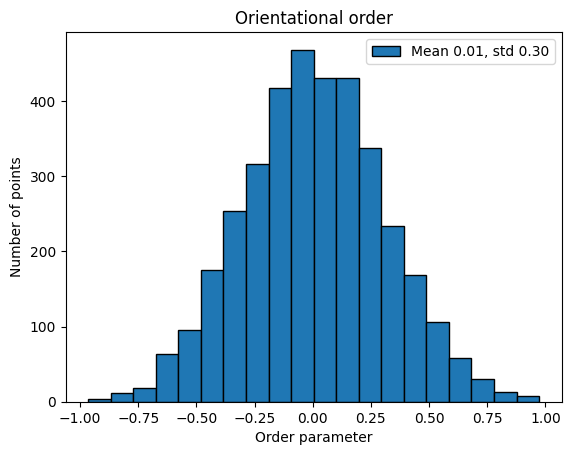

In [59]:
updated_df_random = voronoi_analyser_random.calculate_orientational_order(absolute = False)
order_random=updated_df_random.loc[df_random['Point of Voronoi']==1, 'Hexatic order']
voronoi_plotter.order_hist(order_random)

In [60]:
updated_df_random

,Pipe radius,Center x coordinate,Center y coordinate,Point of Voronoi,Area,Region index,Hexatic order
0,1.0,57.459,88.603,1.0,11.025,5134.0,0.042724
1,1.0,-78.337,178.851,0.0,2544038.701,315.0,0.000000
2,1.0,-65.421,55.455,1.0,7.837,2310.0,0.360543
3,1.0,8.277,83.598,1.0,8.122,2896.0,-0.213177
4,1.0,-85.697,9.891,0.0,104.511,5208.0,0.000000
...,...,...,...,...,...,...,...
5351,1.0,18.991,-136.955,1.0,6.574,5046.0,-0.022902
5352,1.0,69.206,51.772,1.0,8.067,732.0,0.152596
5353,1.0,25.594,-136.101,1.0,6.237,4001.0,0.153111
5354,1.0,65.865,123.949,1.0,6.496,367.0,-0.497647


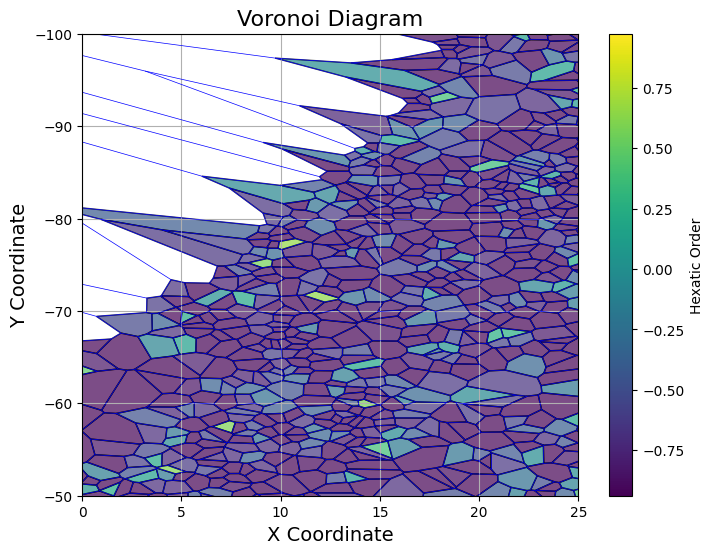

In [74]:
voronoi_plotter.hexatic_order(order)

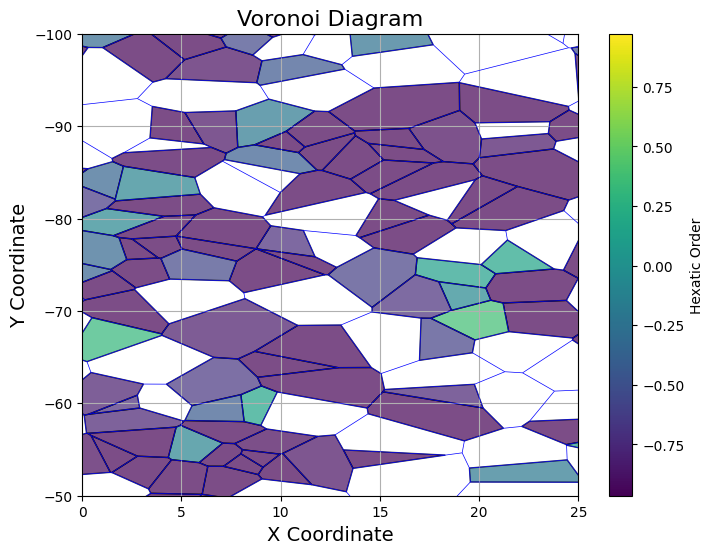

In [75]:
voronoi_plotter_random.hexatic_order(order_random)

In [174]:
r_values = np.linspace(1, 200, 150)  # Distances for K(r)
area = 200 * 200
k_results = voronoi_analyser.calculate_ripleys_k(r_values, area)

(11101,)
(4992, 4992)


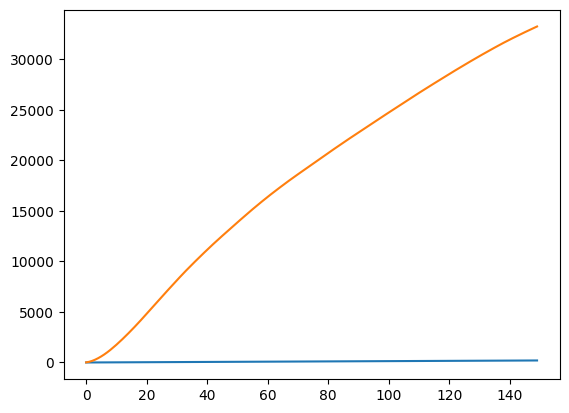

In [171]:
plt.plot(k_results)

In [163]:
k_results

,r,K(r)
0,1.0,2.909885
1,2.0,12.535384
2,3.0,27.354527
3,4.0,46.855975
4,5.0,70.574149
5,6.0,97.777763
6,7.0,128.547090
7,8.0,162.462304
8,9.0,199.088327
9,10.0,238.755080
